In [1]:
import cv2
from urllib.request import urlopen
from PIL import Image
import IPython
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd, numpy as np
from keras.datasets import mnist, fashion_mnist
import random
from sklearn.preprocessing import OneHotEncoder
from tensorflow.keras.losses import CategoricalCrossentropy,SparseCategoricalCrossentropy,BinaryCrossentropy
from sklearn.datasets import make_blobs
from mlxtend.plotting import plot_decision_regions
import tensorflow as tf
print(tf.__version__)
from sklearn import preprocessing
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

2.12.0


In [2]:
#Defining Helper Functions
def generate_multiclass_blobs(num_samples_total, training_split, cluster_centers, num_classes, loss_function_used):
    X, targets = make_blobs(n_samples = num_samples_total, centers = cluster_centers, n_features = num_classes, center_box=(0, 1), cluster_std = 1.5)
    categorical_targets = to_categorical(targets)
    X_training = X[training_split:, :]
    X_testing = X[:training_split, :]
    Targets_training = categorical_targets[training_split:]
    Targets_testing = categorical_targets[:training_split].astype(np.int32)
    return X_training, Targets_training, X_testing, Targets_testing


def generate_binary_blobs(num_samples_total, training_split, loss_function_used):
    X, targets = make_blobs(n_samples = num_samples_total, centers = [(0,0), (15,15)], n_features = 2, center_box=(0, 1), cluster_std = 2.5)
    targets[np.where(targets == 0)] = -1
    X_training = X[training_split:, :]
    X_testing = X[:training_split, :]
    Targets_training = targets[training_split:]
    Targets_testing = targets[:training_split]
    return X_training, Targets_training, X_testing, Targets_testing

In [10]:
#Binary Classification
num_samples = 1000
test_split = 250
cluster_centers = [(15,0), (30,15)]
num_classes = len(cluster_centers)
loss_function_used = BinaryCrossentropy(from_logits=True)

In [4]:
X_training, Targets_training, X_testing, Targets_testing=generate_binary_blobs(num_samples, test_split, loss_function_used)

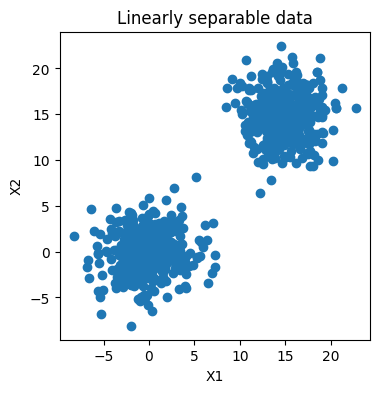

In [5]:
plt.figure(figsize=(4, 4))
plt.scatter(X_training[:,0], X_training[:,1])
plt.title('Linearly separable data')
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

In [6]:
feature_vector_shape = X_training.shape[1]
input_shape = (feature_vector_shape,)

model = Sequential()
model.add(Dense(12, input_shape=input_shape, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(8, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(1, activation = 'sigmoid'))

In [7]:
model.compile(loss=loss_function_used, optimizer=tf.keras.optimizers.Adam(lr=0.01), metrics=['accuracy'])
history = model.fit(X_training, Targets_training, epochs=30, batch_size=5, verbose=1, validation_split=0.2)

Epoch 1/30


/usr/local/lib/python3.10/dist-packages/keras/backend.py:5703: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


120/120 [==============================] - 3s 9ms/step - loss: -0.2944 - accuracy: 0.4867 - val_loss: -1.3785 - val_accuracy: 0.4733
Epoch 2/30
120/120 [==============================] - 0s 4ms/step - loss: -1.9597 - accuracy: 0.4767 - val_loss: -3.6195 - val_accuracy: 0.4467
Epoch 3/30
120/120 [==============================] - 0s 2ms/step - loss: -4.5860 - accuracy: 0.4717 - val_loss: -7.9836 - val_accuracy: 0.4467
Epoch 4/30
120/120 [==============================] - 0s 2ms/step - loss: -9.8200 - accuracy: 0.4617 - val_loss: -16.1972 - val_accuracy: 0.4533
Epoch 5/30
120/120 [==============================] - 0s 2ms/step - loss: -18.6984 - accuracy: 0.4700 - val_loss: -30.2519 - val_accuracy: 0.4400
Epoch 6/30
120/120 [==============================] - 0s 2ms/step - loss: -33.2695 - accuracy: 0.4667 - val_loss: -51.8335 - val_accuracy: 0.4667
Epoch 7/30
120/120 [==============================] - 0s 2ms/step - loss: -55.7824 - accuracy: 0.4700 - val_loss: -84.4457 - val_accuracy: 0.4

In [8]:
test_results = model.evaluate(X_testing, Targets_testing, verbose=1)
print(f'Test results - Loss: {test_results[0]} - Accuracy: {test_results[1]*100}%')

8/8 [==============================] - 0s 5ms/step - loss: -4280.8530 - accuracy: 0.5120
Test results - Loss: -4280.85302734375 - Accuracy: 51.20000243186951%


9600/9600 [==============================] - 14s 1ms/step


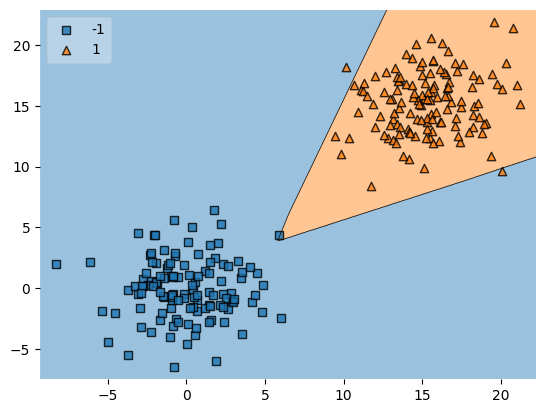

<Figure size 400x400 with 0 Axes>

In [9]:
plot_decision_regions(X_testing, Targets_testing, clf=model, legend=2)
plt.figure(figsize=(4, 4))
plt.show()

In [12]:
#Multiclass Classification
num_samples = 1000
train_split = 250
cluster_centers = [(-10, 5), (0, 0), (10, 5)]
num_classes = len(cluster_centers)
loss_function_used = CategoricalCrossentropy(from_logits=True)

In [13]:
X_training, Targets_training, X_testing, Targets_testing= generate_multiclass_blobs(num_samples, train_split,
              cluster_centers, num_classes,
              loss_function_used)

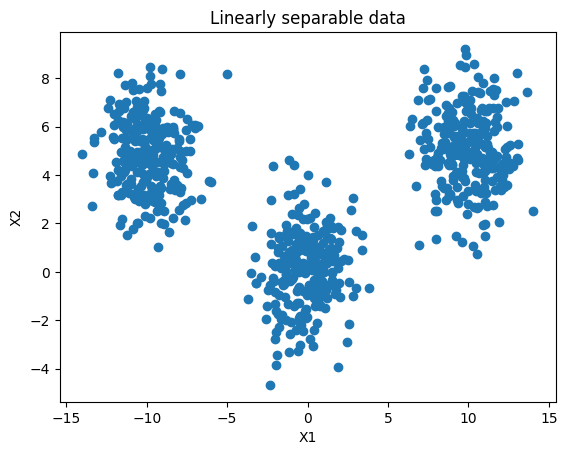

In [14]:
plt.scatter(X_training[:,0], X_training[:,1])
plt.title('Linearly separable data')
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

In [15]:
feature_vector_shape = X_training.shape[1]
input_shape = (feature_vector_shape,)

model = Sequential()
model.add(Dense(12, input_shape=input_shape, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(8, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(num_classes, activation='softmax'))

In [16]:
model.compile(loss=loss_function_used, optimizer=tf.keras.optimizers.Adam(lr=0.001), metrics=['accuracy'])
history = model.fit(X_training, Targets_training, epochs=30, batch_size=5, verbose=1, validation_split=0.2)

Epoch 1/30


/usr/local/lib/python3.10/dist-packages/keras/backend.py:5561: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


120/120 [==============================] - 3s 8ms/step - loss: 3.2972 - accuracy: 0.5683 - val_loss: 0.5551 - val_accuracy: 0.7933
Epoch 2/30
120/120 [==============================] - 1s 5ms/step - loss: 0.3691 - accuracy: 0.8583 - val_loss: 0.2665 - val_accuracy: 0.9067
Epoch 3/30
120/120 [==============================] - 1s 5ms/step - loss: 0.2394 - accuracy: 0.9333 - val_loss: 0.1932 - val_accuracy: 0.9467
Epoch 4/30
120/120 [==============================] - 0s 4ms/step - loss: 0.1782 - accuracy: 0.9650 - val_loss: 0.1485 - val_accuracy: 0.9867
Epoch 5/30
120/120 [==============================] - 0s 4ms/step - loss: 0.1382 - accuracy: 0.9783 - val_loss: 0.1192 - val_accuracy: 0.9867
Epoch 6/30
120/120 [==============================] - 1s 5ms/step - loss: 0.1098 - accuracy: 0.9850 - val_loss: 0.0932 - val_accuracy: 1.0000
Epoch 7/30
120/120 [==============================] - 0s 3ms/step - loss: 0.0875 - accuracy: 0.9900 - val_loss: 0.0777 - val_accuracy: 1.0000
Epoch 8/30
120/12

In [17]:
test_results = model.evaluate(X_testing, Targets_testing, verbose=1)
print(f'Test results - Loss: {test_results[0]} - Accuracy: {test_results[1]*100}%')

8/8 [==============================] - 0s 6ms/step - loss: 0.0165 - accuracy: 0.9920
Test results - Loss: 0.016514599323272705 - Accuracy: 99.19999837875366%


In [18]:
class Onehot2Int(object):

    def __init__(self, model):
        self.model = model

    def predict(self, X):
        y_pred = self.model.predict(X)
        return np.argmax(y_pred, axis=1)

# fit keras_model
keras_model_no_ohe = Onehot2Int(model)

9600/9600 [==============================] - 14s 1ms/step


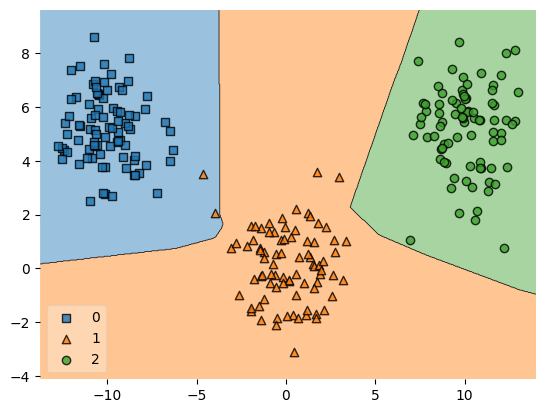

In [19]:
# Plot decision boundary
plot_decision_regions(X_testing, np.argmax(Targets_testing, axis=1), clf=keras_model_no_ohe, legend=3)
plt.show()

# Example: MNIST Hand-Written Digits

In [20]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [21]:
print("X_train shape", X_train.shape)
print("y_train shape", y_train.shape)
print("X_test shape", X_test.shape)
print("y_test shape", y_test.shape)

X_train shape (60000, 28, 28)
y_train shape (60000,)
X_test shape (10000, 28, 28)
y_test shape (10000,)


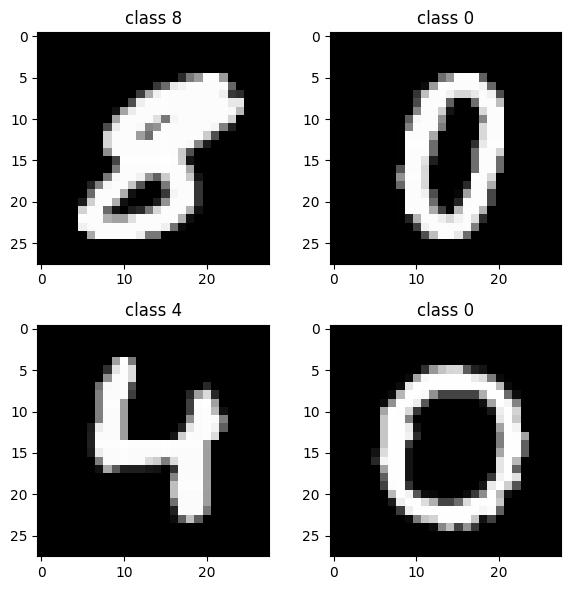

In [22]:
plt.rcParams['figure.figsize'] = (6,6)

for i in range(4):
    plt.subplot(2,2,i+1)
    num = random.randint(0, len(X_train))
    plt.imshow(X_train[num], cmap='gray', interpolation='none')
    plt.title("class {}".format(y_train[num]))

plt.tight_layout()

In [23]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1]* X_train.shape[2])
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1] * X_test.shape[2])

print(X_train.shape)
print(X_test.shape)

(60000, 784)
(10000, 784)


In [24]:
#Next, we need to change integers to 32-bit floating point numbers. We would also need to normalize our input to be in the range [0, 1], rather than [0-255].
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train /= 255
X_test /= 255

In [25]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [26]:
enc = OneHotEncoder(sparse=False)
enc.fit(y_train.reshape(-1, 1))
print(enc.categories_)

[array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)]


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [27]:
y_train_enc = enc.transform(y_train.reshape(-1,1))
y_test_enc = enc.transform(y_test.reshape(-1,1))

In this multi-class classification task, we want to interpret our logistic regression model's results as a probability distribution; that is the model should output a vector that represents the probability of the given image belonging to each of the 10 classes.

All elements in the vector should fall into the [0,1] range and sum up to 1. In order to set up our classification problem this way, we can feed the model output to a softmax function to produce probabilities.

For training our multi-class logistic classifier, we need a loss function. Categorical cross-entropy is a loss function widely used with softmax. We need to minimize this loss function in order to determine an optimal set of parameters.

We will build a simple CNN model with two hidden layers, that uses softmax as the activation function, and categorical cross-entropy as the loss function. Let's define the architecture of our model:

In [28]:
feature_vector_shape = X_train.shape[1]
input_shape = (feature_vector_shape,)
num_classes = 10
loss_function_used=CategoricalCrossentropy(from_logits=True)
model = Sequential()
model.add(Dense(12, input_shape=input_shape, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(8, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(num_classes, activation='softmax'))

In [29]:
model.compile(loss=loss_function_used, optimizer=tf.keras.optimizers.Adam(lr=0.001), metrics=['accuracy'])
history = model.fit(X_train, y_train_enc, epochs=25, batch_size=5, verbose=1, validation_split=0.2)

Epoch 1/25


/usr/local/lib/python3.10/dist-packages/keras/backend.py:5561: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


9600/9600 [==============================] - 34s 3ms/step - loss: 0.4509 - accuracy: 0.8669 - val_loss: 0.2768 - val_accuracy: 0.9184
Epoch 2/25
9600/9600 [==============================] - 24s 2ms/step - loss: 0.2710 - accuracy: 0.9208 - val_loss: 0.2446 - val_accuracy: 0.9275
Epoch 3/25
9600/9600 [==============================] - 24s 2ms/step - loss: 0.2404 - accuracy: 0.9291 - val_loss: 0.2157 - val_accuracy: 0.9375
Epoch 4/25
9600/9600 [==============================] - 25s 3ms/step - loss: 0.2209 - accuracy: 0.9340 - val_loss: 0.2228 - val_accuracy: 0.9365
Epoch 5/25
9600/9600 [==============================] - 25s 3ms/step - loss: 0.2060 - accuracy: 0.9391 - val_loss: 0.1972 - val_accuracy: 0.9417
Epoch 6/25
9600/9600 [==============================] - 22s 2ms/step - loss: 0.1951 - accuracy: 0.9419 - val_loss: 0.2030 - val_accuracy: 0.9417
Epoch 7/25
9600/9600 [==============================] - 23s 2ms/step - loss: 0.1886 - accuracy: 0.9439 - val_loss: 0.1954 - val_accuracy: 0.9

In [30]:
test_results = model.evaluate(X_test, y_test_enc, verbose=1)
print(f'Test results - Loss: {test_results[0]} - Accuracy: {test_results[1]*100}%')

313/313 [==============================] - 1s 3ms/step - loss: 0.2009 - accuracy: 0.9466
Test results - Loss: 0.2009003609418869 - Accuracy: 94.66000199317932%


# Example: Single-Digit House Number Recognition

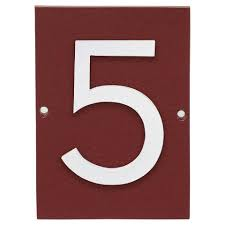

In [31]:
URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML311-Coursera/images/house_number_5.jpeg'
image = Image.open(urlopen(URL)).convert('RGB')
image

In [32]:
feature_vector_shape,input_shape = 784,784
num_classes = 10
loss_function_used = CategoricalCrossentropy(from_logits=True)
model = Sequential()
model.add(Dense(12, input_shape=(input_shape,), activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(8, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=loss_function_used, optimizer=tf.keras.optimizers.Adam(lr=0.001), metrics=['accuracy'])
history = model.fit(X_train, y_train_enc, epochs=25, batch_size=5, verbose=1, validation_split=0.2)

Epoch 1/25
9600/9600 [==============================] - 31s 3ms/step - loss: 0.5504 - accuracy: 0.8419 - val_loss: 0.3064 - val_accuracy: 0.9125
Epoch 2/25
9600/9600 [==============================] - 25s 3ms/step - loss: 0.2939 - accuracy: 0.9152 - val_loss: 0.2658 - val_accuracy: 0.9222
Epoch 3/25
9600/9600 [==============================] - 26s 3ms/step - loss: 0.2446 - accuracy: 0.9275 - val_loss: 0.2430 - val_accuracy: 0.9286
Epoch 4/25
9600/9600 [==============================] - 22s 2ms/step - loss: 0.2218 - accuracy: 0.9337 - val_loss: 0.2091 - val_accuracy: 0.9408
Epoch 5/25
9600/9600 [==============================] - 24s 3ms/step - loss: 0.2064 - accuracy: 0.9377 - val_loss: 0.2120 - val_accuracy: 0.9397
Epoch 6/25
9600/9600 [==============================] - 24s 3ms/step - loss: 0.1950 - accuracy: 0.9420 - val_loss: 0.2170 - val_accuracy: 0.9384
Epoch 7/25
9600/9600 [==============================] - 21s 2ms/step - loss: 0.1875 - accuracy: 0.9434 - val_loss: 0.1996 - val_ac

In [33]:
#We must now pre-process our raw input images to be grayscale and 28x28 in size.
img_rows, img_cols = 28, 28
img = Image.fromarray(np.uint8(image)).convert('L')
img_gray = img.resize((img_rows, img_cols), Image.ANTIALIAS)
img_gray

<ipython-input-33-49cbb6807a3b>:4: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  img_gray = img.resize((img_rows, img_cols), Image.ANTIALIAS)


In [34]:
#We will now convert the image to an array, and reshape it such that it has a dimension of (1, 784).
arr = np.array(img_gray)
arr = arr.reshape((img_cols*img_rows))
arr = np.expand_dims(arr, axis=0)

In [35]:
prediction = model.predict(arr)
np.argmax(prediction)

1/1 [==============================] - 0s 287ms/step


3

Exercise 1 - Loading and plotting the images

4422102/4422102 [==============================] - 0s 0us/step


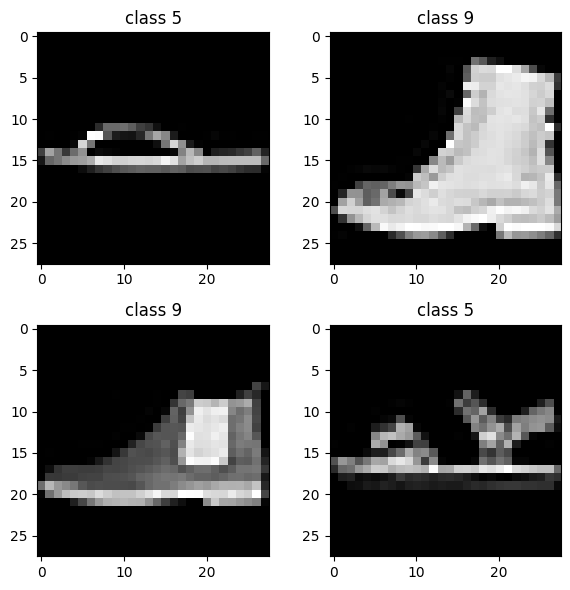

In [36]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()


plt.rcParams['figure.figsize'] = (6,6)

for i in range(4):
    plt.subplot(2,2,i+1)
    num = random.randint(0, len(X_train))
    plt.imshow(X_train[num], cmap='gray', interpolation='none')
    plt.title("class {}".format(y_train[num]))

plt.tight_layout()

Exercise 2 - Preparing the data

In [37]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1]* X_train.shape[2])
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1] * X_test.shape[2])

print(X_train.shape)
print(X_test.shape)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train /= 255
X_test /= 255

(60000, 784)
(10000, 784)


Exercise 3 - One-hot encoding


In [38]:
enc = OneHotEncoder(sparse=False)
enc.fit(y_train.reshape(-1, 1))
print(enc.categories_)
y_train_enc = enc.transform(y_train.reshape(-1,1))
y_test_enc = enc.transform(y_test.reshape(-1,1))

[array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)]


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Exercise 4 - Build model architecture

In [39]:
feature_vector_shape = X_train.shape[1]
input_shape = (feature_vector_shape,)
num_classes = 10
loss_function_used = CategoricalCrossentropy(from_logits=True)

model = Sequential()
model.add(Dense(12, input_shape=input_shape, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(8, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(num_classes, activation='softmax'))


model.compile(loss=loss_function_used, optimizer=tf.keras.optimizers.Adam(lr=0.001), metrics=['accuracy'])
history = model.fit(X_train, y_train_enc, epochs=25, batch_size=5, verbose=1, validation_split=0.2)

test_results = model.evaluate(X_test, y_test_enc, verbose=1)
print(f'Test results - Loss: {test_results[0]} - Accuracy: {test_results[1]*100}%')

Epoch 1/25


/usr/local/lib/python3.10/dist-packages/keras/backend.py:5561: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


9600/9600 [==============================] - 35s 4ms/step - loss: 0.5993 - accuracy: 0.7887 - val_loss: 0.5050 - val_accuracy: 0.8255
Epoch 2/25
9600/9600 [==============================] - 28s 3ms/step - loss: 0.4487 - accuracy: 0.8407 - val_loss: 0.4368 - val_accuracy: 0.8414
Epoch 3/25
9600/9600 [==============================] - 23s 2ms/step - loss: 0.4194 - accuracy: 0.8503 - val_loss: 0.4647 - val_accuracy: 0.8293
Epoch 4/25
9600/9600 [==============================] - 21s 2ms/step - loss: 0.4015 - accuracy: 0.8558 - val_loss: 0.4146 - val_accuracy: 0.8524
Epoch 5/25
9600/9600 [==============================] - 25s 3ms/step - loss: 0.3902 - accuracy: 0.8590 - val_loss: 0.4542 - val_accuracy: 0.8409
Epoch 6/25
9600/9600 [==============================] - 24s 3ms/step - loss: 0.3813 - accuracy: 0.8616 - val_loss: 0.4164 - val_accuracy: 0.8518
Epoch 7/25
9600/9600 [==============================] - 24s 3ms/step - loss: 0.3752 - accuracy: 0.8649 - val_loss: 0.4297 - val_accuracy: 0.8

#(Optional) Exercise 5 - Sparse Categorical Cross Entropy

We saw that when using categorical cross-entropy, the ground truth labels need to be one-hot encoded. Keras provides another loss function called sparse cross-entropy where we can leave the labels as integers.

Build a CNN model with two hidden layers, that uses softmax as the activation function, and sparse categorical cross-entropy as the loss function. Make sure to use the non-one-hot encoded ground-truth labels.

In [40]:
feature_vector_shape = X_train.shape[1]
input_shape = (feature_vector_shape,)
num_classes = 10
loss_function_used = SparseCategoricalCrossentropy()

model = Sequential()
model.add(Dense(12, input_shape=input_shape, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(8, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(num_classes, activation='softmax'))


model.compile(loss=loss_function_used, optimizer=tf.keras.optimizers.Adam(lr=0.001), metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=25, batch_size=5, verbose=1, validation_split=0.2)

test_results = model.evaluate(X_test, y_test_enc, verbose=1)
print(f'Test results - Loss: {test_results[0]} - Accuracy: {test_results[1]*100}%')

Epoch 1/25
9600/9600 [==============================] - 30s 3ms/step - loss: 0.6130 - accuracy: 0.7877 - val_loss: 0.4859 - val_accuracy: 0.8302
Epoch 2/25
9600/9600 [==============================] - 24s 2ms/step - loss: 0.4634 - accuracy: 0.8375 - val_loss: 0.4561 - val_accuracy: 0.8424
Epoch 3/25
9600/9600 [==============================] - 22s 2ms/step - loss: 0.4346 - accuracy: 0.8465 - val_loss: 0.4541 - val_accuracy: 0.8381
Epoch 4/25
9600/9600 [==============================] - 21s 2ms/step - loss: 0.4168 - accuracy: 0.8516 - val_loss: 0.4427 - val_accuracy: 0.8438
Epoch 5/25
9600/9600 [==============================] - 24s 3ms/step - loss: 0.4056 - accuracy: 0.8547 - val_loss: 0.4325 - val_accuracy: 0.8500
Epoch 6/25
9600/9600 [==============================] - 25s 3ms/step - loss: 0.3936 - accuracy: 0.8592 - val_loss: 0.4207 - val_accuracy: 0.8539
Epoch 7/25
9600/9600 [==============================] - 24s 3ms/step - loss: 0.3870 - accuracy: 0.8614 - val_loss: 0.4112 - val_ac

ValueError: ignored